## Mnist Classificação

In [4]:
import warnings
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as plt

In [5]:
warnings.filterwarnings('ignore',category=FutureWarning)

In [6]:
from sklearn.linear_model   import SGDClassifier
from sklearn.datasets       import fetch_openml

Cada imagem e rotulada com o algoritmo que representa `Y`

In [7]:
mnist = fetch_openml('mnist_784',version=1)

In [14]:
X:pd.DataFrame = mnist['data']
Y:pd.DataFrame = mnist['target'].astype(int)

In [15]:
X.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Y.head(2)

0    5
1    0
Name: class, dtype: int64

> Algarismo rotulados

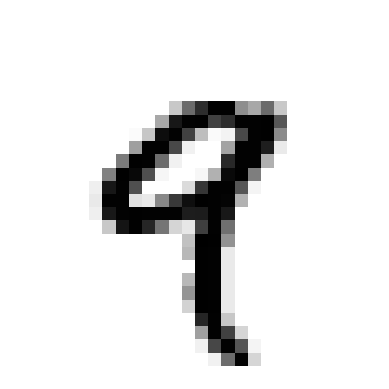

9

In [23]:
algarismo = X.iloc[4].values.reshape(28,28)
plt.imshow(algarismo,cmap='binary')
plt.axis(False)
plt.show()
display(Y.iloc[4])

In [68]:
from sklearn.model_selection import (
    GridSearchCV     ,
    StratifiedKFold  ,
    cross_val_score  ,
    cross_val_predict,
    train_test_split 
    )
from sklearn.base    import ( clone )
from sklearn.metrics import *

In [117]:
from yellowbrick.classifier import (
    PrecisionRecallCurve,
    ROCAUC
    )

In [34]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y,random_state=0,test_size=10_000)

## Classificador binário

In [54]:
X9 = X.iloc[4]

In [39]:
ytrain9 = (ytrain == 9).astype(int) 
ytest9  = (ytest  == 9).astype(int)

In [46]:
gradiente = SGDClassifier(random_state=42)

In [78]:
gradiente.fit(xtrain,ytrain9)
predgrad9 = gradiente.predict(xtrain)

In [79]:
confusion_matrix(ytrain9,predgrad9)

array([[51254,  2757],
       [  700,  5289]])

In [66]:
Strkfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

for (train , test) in Strkfold.split(xtrain,ytrain9):
    xtrainSKF ,xtestSKF = xtrain.iloc[train]  , xtrain.iloc[test]
    ytrainSKF ,ytestSKF = ytrain9.iloc[train] , ytrain9.iloc[test]

    gradClone = clone(gradiente)
    gradClone.fit(xtrainSKF,ytrainSKF)
    predSKF   = gradClone.predict(xtestSKF)
    print(accuracy_score(ytestSKF,predSKF))

0.9092
0.9488
0.91695


In [67]:
cross_val_score(gradiente,xtrain,ytrain9,cv=3,scoring='accuracy')

array([0.9476 , 0.9508 , 0.94545])

In [72]:
predCross9 = cross_val_predict(gradiente,xtrain,ytrain9,cv=3)

In [73]:
confusion_matrix(ytrain9,predCross9)

array([[52515,  1496],
       [ 1627,  4362]])

/home/mateus/MEGA/Projetos/AprendendoLivroMaosaObra-SkleanKerasTensorFLow/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


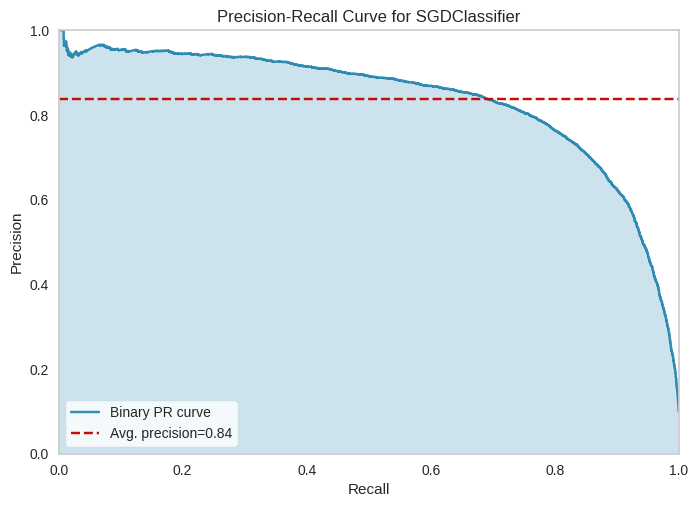

In [84]:
recall = PrecisionRecallCurve(gradiente)
recall.fit(xtrain,ytrain9)
recall.score(xtrain,ytrain9)
recall.show()
plt.show()

In [101]:
predtp = cross_val_predict(gradiente,xtrain,ytrain9,cv=3,method='decision_function')

In [104]:
precision, recall ,thresholds = precision_recall_curve(ytrain9,predtp)

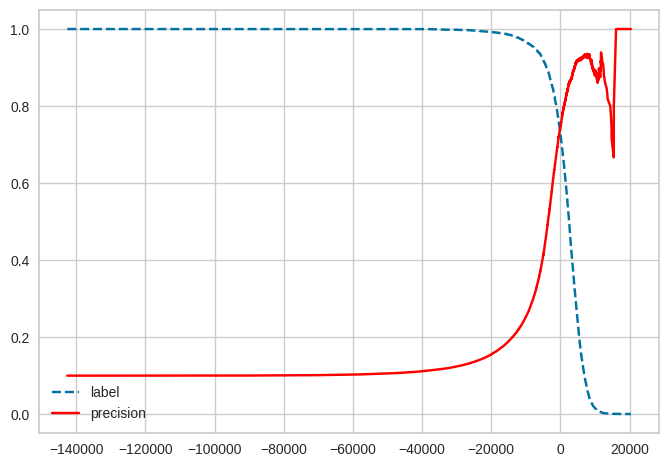

In [113]:
plt.plot(thresholds,recall[:-1],'b--' ,label='recall')
plt.plot(thresholds,precision[:-1]    ,label='precision',c='red')
plt.legend(['label','precision'])
plt.show()

<module 'matplotlib.pyplot' from '/home/mateus/MEGA/Projetos/AprendendoLivroMaosaObra-SkleanKerasTensorFLow/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

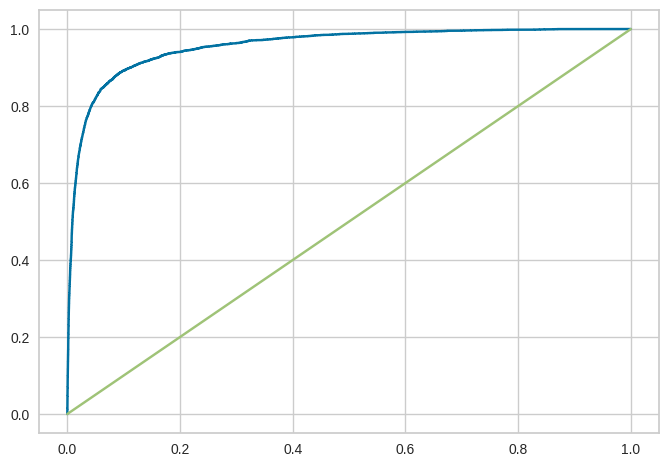

In [129]:
fpr , tpr , thresholds = roc_curve(ytrain9,predtp)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt

In [115]:
print(classification_report(ytrain9,predCross9))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     54011
           1       0.74      0.73      0.74      5989

    accuracy                           0.95     60000
   macro avg       0.86      0.85      0.85     60000
weighted avg       0.95      0.95      0.95     60000

